In [1]:
 from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/ML_train4.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90439 entries, 0 to 90438
Columns: 409 entries, yellow sputum to conflicting_diseases
dtypes: int64(406), object(3)
memory usage: 282.2+ MB
None


<ipython-input-2-0c82eda4ed95>:3: DtypeWarning: Columns (408) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/ML_train4.csv')


# Visualize Data Distribution

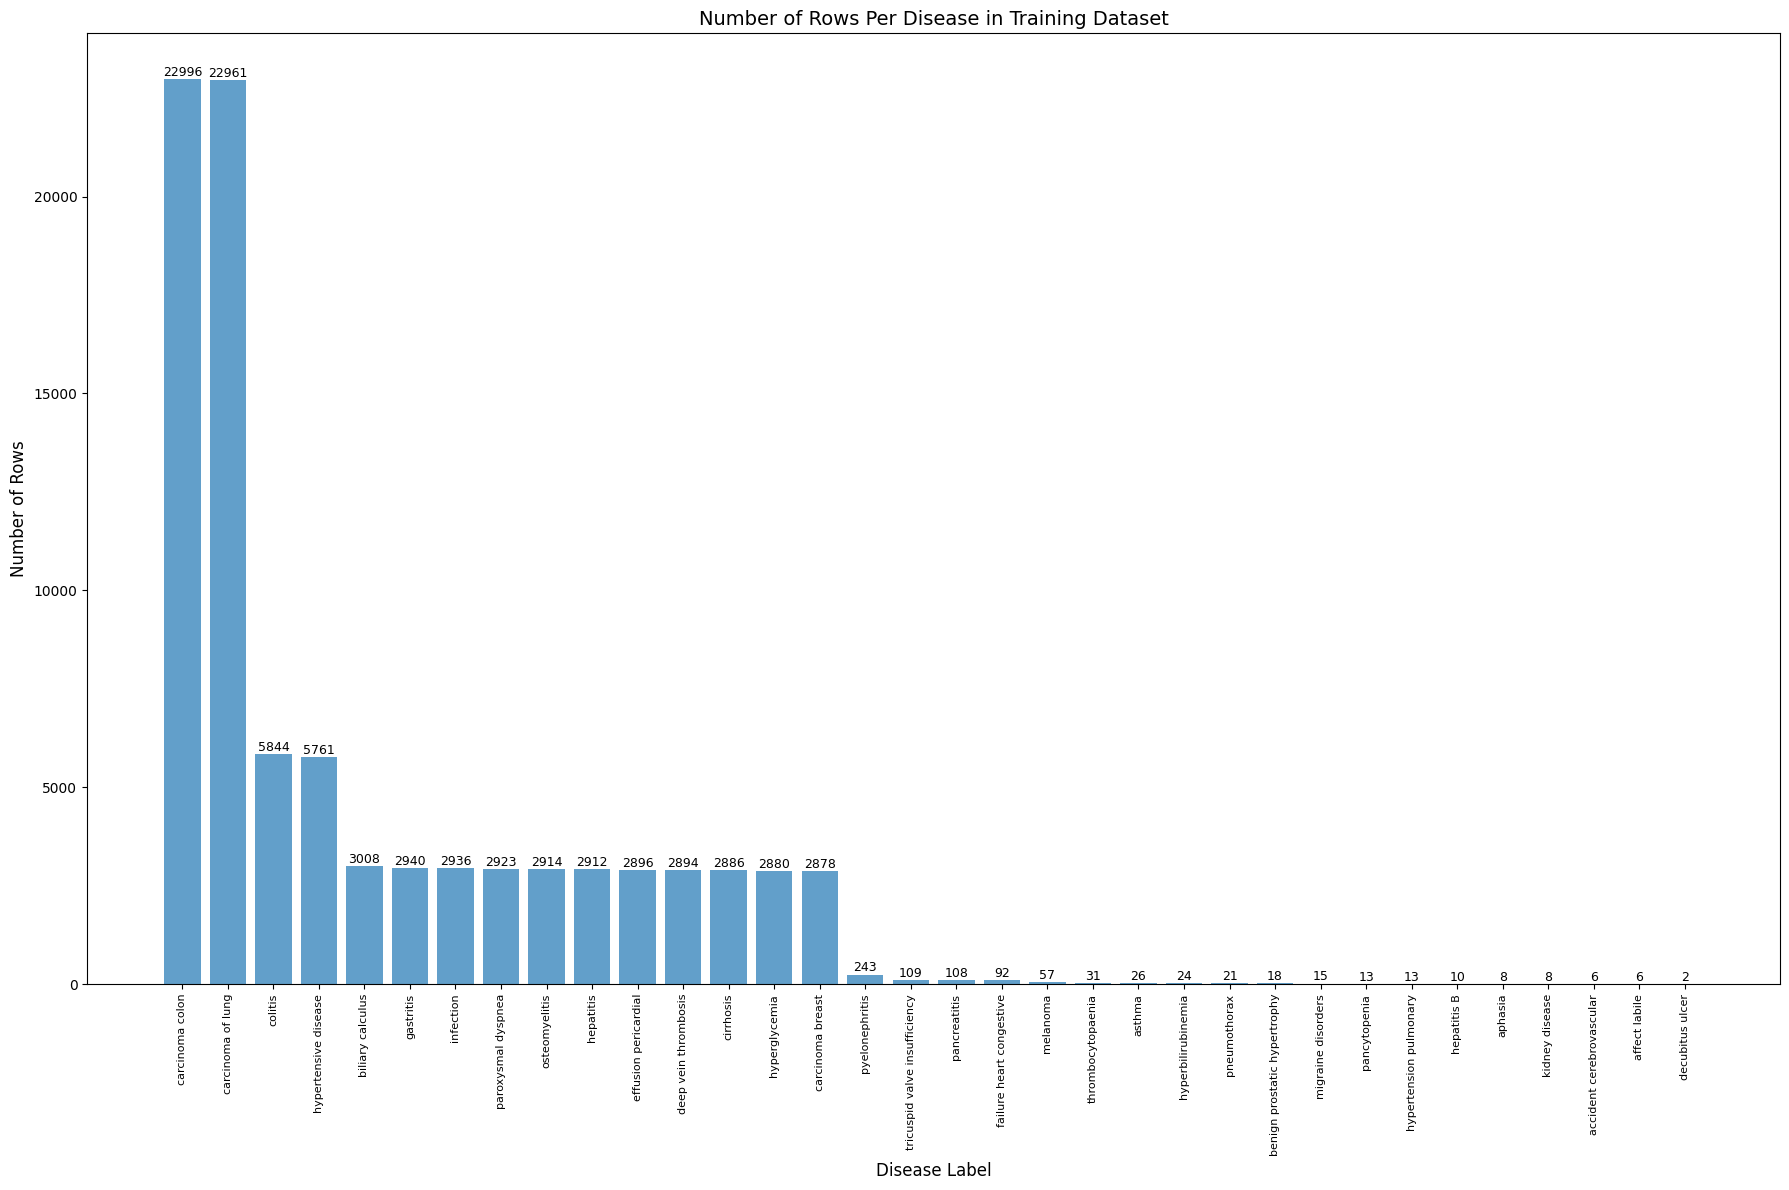

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Naive Bayes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_train4.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_val.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_test.csv")
# Separate features and target
X_train, y_train = train_data.iloc[:, :-3], train_data["disease_label"]
X_valid, y_valid = valid_data.iloc[:, :-1], valid_data["disease_label"]
X_test, y_test = test_data.iloc[:, :-1], test_data["disease_label"]

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# **Optional**: Use validation set to tune hyperparameters manually
# Evaluate on validation set (for tuning, NOT for final performance reporting)
y_valid_pred = nb_model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy (for hyperparameter tuning only): {valid_accuracy:.2f}")

# Evaluate on test set (for final performance reporting)
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (final evaluation): {test_accuracy:.2f}")

# Print a detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

<ipython-input-4-5df1a0e849eb>:7: DtypeWarning: Columns (408) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_train4.csv")


Validation Accuracy (for hyperparameter tuning only): 0.98
Test Accuracy (final evaluation): 0.98

Classification Report (Test Set):
                               precision    recall  f1-score   support

     accident cerebrovascular       0.91      0.29      0.44        34
                affect labile       0.97      0.79      0.87        89
                      aphasia       0.94      0.79      0.86        43
                       asthma       0.93      0.87      0.90        76
 benign prostatic hypertrophy       0.85      0.91      0.88        76
             biliary calculus       0.91      0.98      0.95       614
             carcinoma breast       0.99      1.00      0.99       614
              carcinoma colon       1.00      1.00      1.00      4915
            carcinoma of lung       1.00      1.00      1.00      4915
                    cirrhosis       0.99      1.00      0.99       614
                      colitis       0.97      1.00      0.99      1228
              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Visualize tail-part diseases (17 diseases)


<Figure size 1800x800 with 0 Axes>

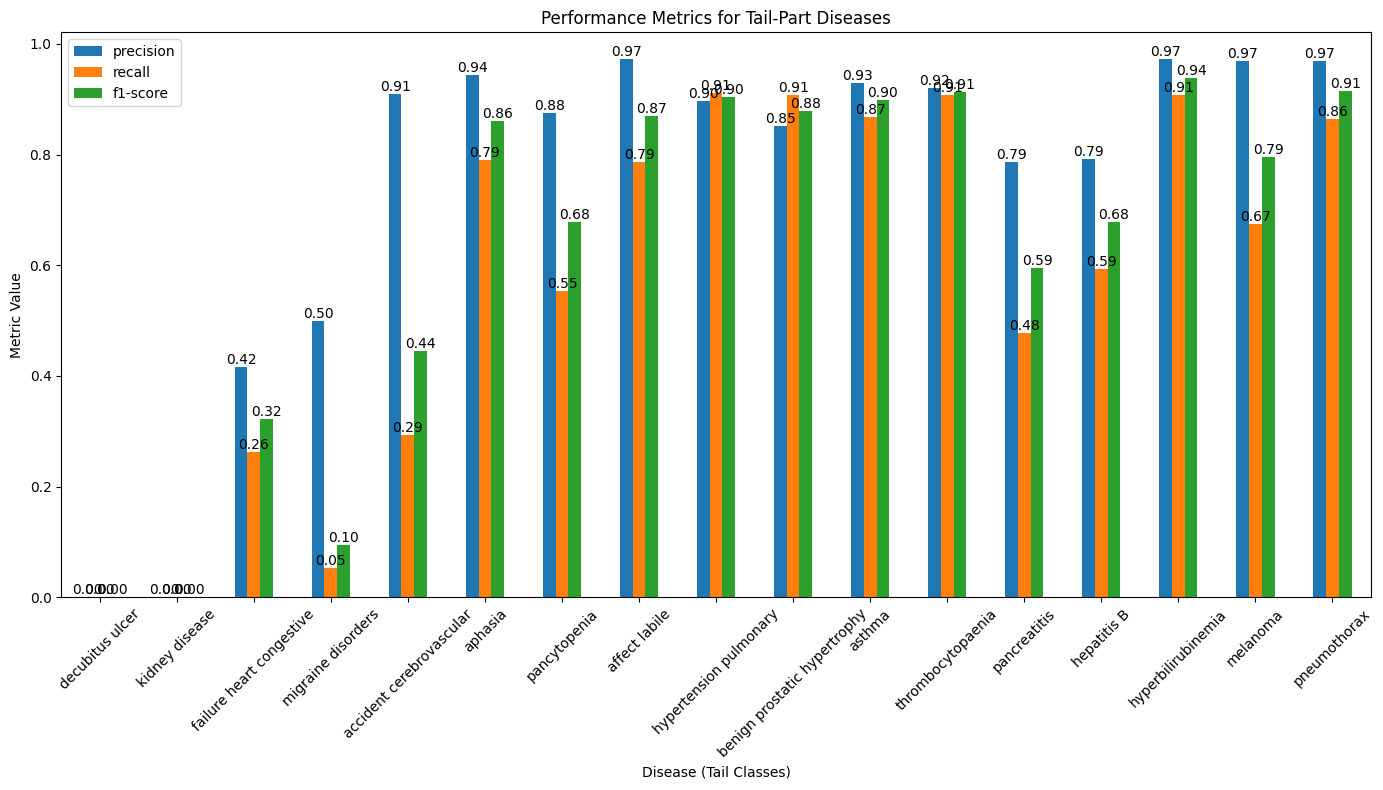

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming `y_test` and `y_test_pred` are defined from the model's predictions

# Generate the classification report
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()

# Define tail-part diseases (manually based on the chart or derived from the dataset)
tail_part_diseases = [
    "decubitus ulcer", "kidney disease", "failure heart congestive", "migraine disorders", "accident cerebrovascular",
    "aphasia", "pancytopenia", "affect labile", "hypertension pulmonary", "benign prostatic hypertrophy",
    "asthma", "thrombocytopaenia", "pancreatitis", "hepatitis B", "hyperbilirubinemia",
    "melanoma", "pneumothorax"
]

# Extract metrics for tail-part diseases
tail_metrics = report_df.loc[tail_part_diseases, ["precision", "recall", "f1-score"]]

# Plot the metrics for tail-part diseases
plt.figure(figsize=(18, 8))
ax = tail_metrics.plot(kind='bar', figsize=(14, 8), legend=True)

# Annotate values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title("Performance Metrics for Tail-Part Diseases")
plt.xlabel("Disease (Tail Classes)")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


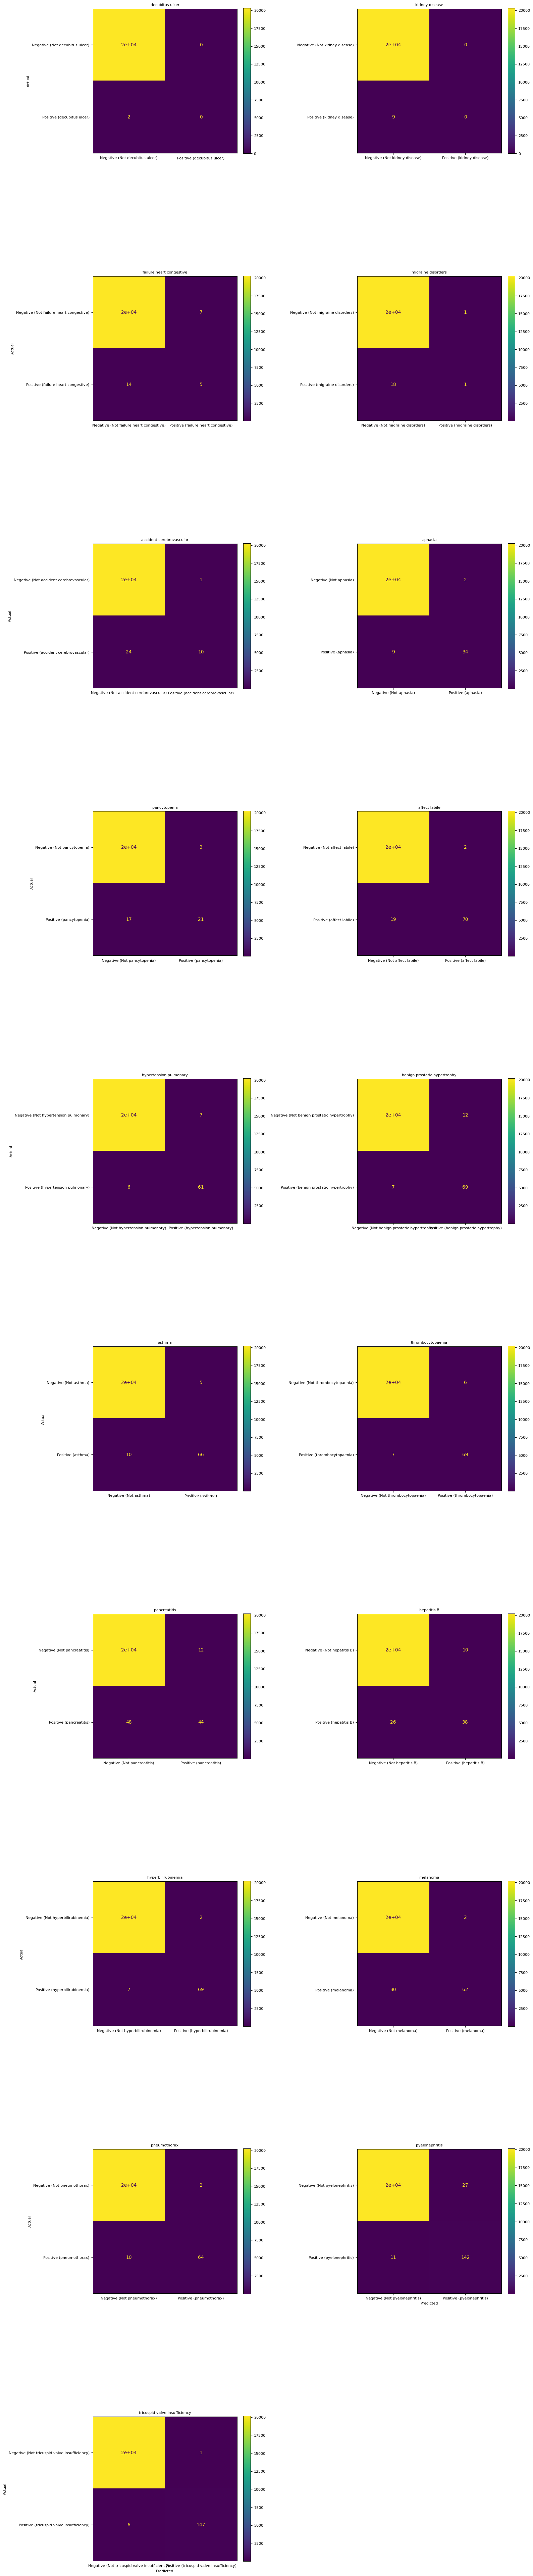

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the tail-part diseases
tail_part_diseases = [
    "decubitus ulcer", "kidney disease", "failure heart congestive", "migraine disorders", "accident cerebrovascular",
    "aphasia", "pancytopenia", "affect labile", "hypertension pulmonary", "benign prostatic hypertrophy",
    "asthma", "thrombocytopaenia", "pancreatitis", "hepatitis B", "hyperbilirubinemia",
    "melanoma", "pneumothorax", "pyelonephritis", "tricuspid valve insufficiency"
]

# Plot settings
num_plots_per_row = 2
plot_size = (8, 8)

# Initialize plot count
plt.figure(figsize=(plot_size[0] * num_plots_per_row, plot_size[1] * ((len(tail_part_diseases) + num_plots_per_row - 1) // num_plots_per_row)))

# Loop through each disease in the tail_part_diseases list
for i, disease in enumerate(tail_part_diseases):
    # Filter test data for the current disease
    y_test_binary = (y_test == disease).astype(int)  # 1 if the disease matches, 0 otherwise
    y_pred_binary = (y_test_pred == disease).astype(int)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

    # Plot the confusion matrix
    ax = plt.subplot((len(tail_part_diseases) + num_plots_per_row - 1) // num_plots_per_row, num_plots_per_row, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (Not " + disease + ")", "Positive (" + disease + ")"])
    disp.plot(cmap='viridis', xticks_rotation='horizontal', ax=ax, colorbar=False)
    cbar = plt.colorbar(disp.im_, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)
    ax.set_title(f"{disease}", fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel("Predicted", fontsize=8)
    ax.set_ylabel("Actual", fontsize=8)
    if i % num_plots_per_row != 0:
        ax.set_ylabel('')
    if i < len(tail_part_diseases) - num_plots_per_row:
        ax.set_xlabel('')

plt.tight_layout()
plt.show()


# Visualize head-part disease (17 diseases)

<Figure size 1800x800 with 0 Axes>

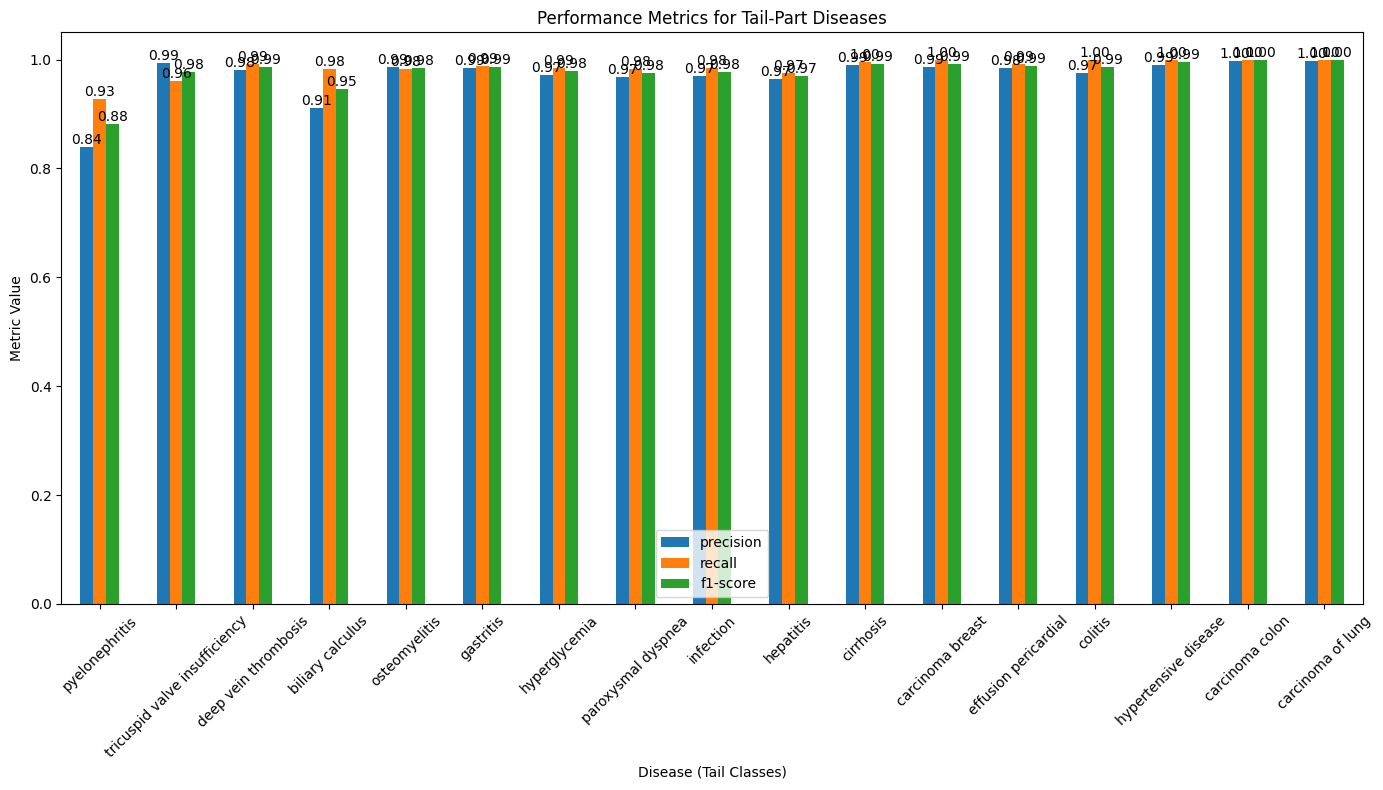

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming `y_test` and `y_test_pred` are defined from the model's predictions

# Generate the classification report
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()

# Define tail-part diseases (manually based on the chart or derived from the dataset)
head_part_diseases = [
    "pyelonephritis", "tricuspid valve insufficiency", "deep vein thrombosis", "biliary calculus", "osteomyelitis",
    "gastritis", "hyperglycemia", "paroxysmal dyspnea", "infection", "hepatitis",
    "cirrhosis", "carcinoma breast", "effusion pericardial", "colitis", "hypertensive disease",
    "carcinoma colon", "carcinoma of lung"
]

# Extract metrics for tail-part diseases
tail_metrics = report_df.loc[head_part_diseases, ["precision", "recall", "f1-score"]]

# Plot the metrics for tail-part diseases
plt.figure(figsize=(18, 8))
ax = tail_metrics.plot(kind='bar', figsize=(14, 8), legend=True)

# Annotate values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title("Performance Metrics for Tail-Part Diseases")
plt.xlabel("Disease (Tail Classes)")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Generate Classification Report

In [8]:

import pandas as pd
from sklearn.metrics import classification_report

# Assuming rf_model is your trained model, and X_test, y_test are defined
y_pred = nb_model.predict(X_test)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert the dictionary to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the classification report as a CSV file
report_df.to_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML/NB-lt-class.csv", index=True)

print("Classification report saved to 'RMclassification_report.csv'")



Classification report saved to 'RMclassification_report.csv'
